# **Diabetes Dataset Overview**

The Diabetes dataset contains data collected from 442 patients, with the aim of predicting diabetes progression over the course of one year. The dataset includes 10 features (predictors) that represent various physiological and lifestyle factors:

**age:** Age of the patient.

**sex:** Gender of the patient (encoded as 0 for female, 1 for male).

**bmi:** Body Mass Index, a measure of body fat based on height and weight.

**bp:** Average blood pressure of the patient.

**s1 to s6:** Six different blood serum measurements that capture various biochemical properties.

**disease_progression:** The target variable, which is a quantitative measure of the patient's diabetes progression one year after the initial measurements.

### **Problem Statement:The goal of the dataset is to predict the disease progression based on these features using SVR model.**

url for SVR: https://www.youtube.com/watch?v=kPw1IGUAoY8

## **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **Load the dataset from the pandas library and print the pandas dataframe:**

In [2]:
# Load the Diabetes dataset
diabetes = load_diabetes()

# Convert to a Pandas DataFrame
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Display the DataFrame
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### **Print the description of the data:**

In [3]:
# Print dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### **Segregate the Independent and dependent variables:**

In [4]:
# Convert features (X) to a DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Convert target (y) to a DataFrame
y = pd.DataFrame(diabetes.target, columns=['disease progression'])

### **Display the X and y dataframes:**

In [5]:
# Display the DataFrames
print("X (features):")
X.head()

X (features):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
print("\nY (disease progression):")
y.head()


Y (disease progression):


,disease progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### **Combining the X and y dataframes:**

In [7]:
# Combine features and target into one DataFrame for analysis
data = pd.concat([X, y], axis=1)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### **Plot the relationship between BMI and disease progression**

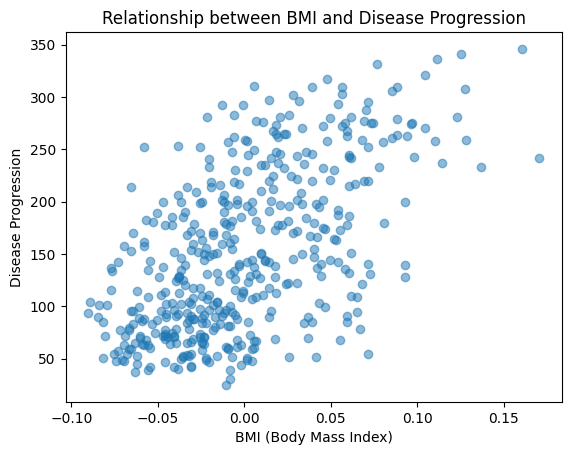

In [9]:
# Example: Plot the relationship between BMI and disease progression
plt.scatter(data['bmi'], data['disease progression'], alpha=0.5)
plt.title("Relationship between BMI and Disease Progression")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression")
plt.show()

### **Split the data into training and testing data**

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Create and train the SVR model**

In [11]:
# Create and train the SVR model
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

## **Make Predictions:**

In [12]:
# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Display predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

Mean Squared Error: 3784.29


ValueError: Data must be 1-dimensional, got ndarray of shape (89, 1) instead

### **Use GridSearch to tune the hyperparameters:**

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5]
}

# Create the SVR model
svr = SVR(kernel='rbf')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform GridSearch on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert from negative MSE to positive

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated MSE: {best_score:.2f}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {mse:.2f}")

# Display predictions and actual values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'C': 1000, 'epsilon': 0.1, 'gamma': 0.1}
Best Cross-Validated MSE: 3164.54
Test Set MSE: 2917.70


ValueError: Per-column arrays must each be 1-dimensional

### **Plot the Actual Values and Predicted Values:**

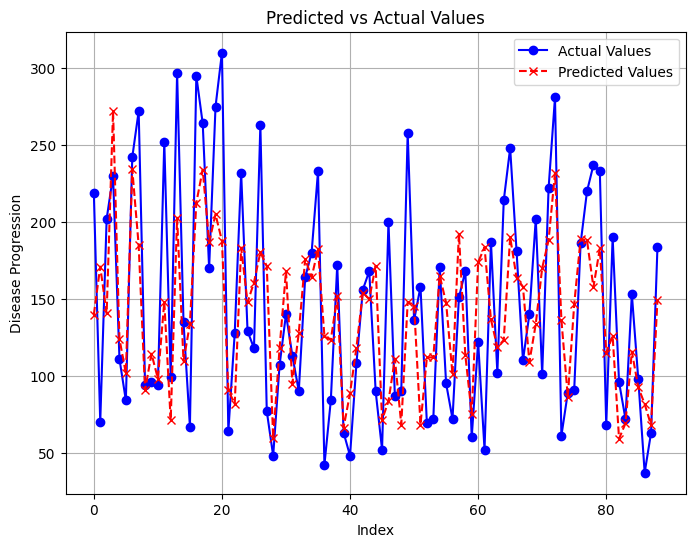

In [14]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))

# Plotting the actual values
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o')

# Plotting the predicted values
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed', marker='x')

# Title and labels
plt.title("Predicted vs Actual Values")
plt.xlabel("Index")
plt.ylabel("Disease Progression")

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
